In [1]:
# libraries for numerical
import pandas as pd  
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn import metrics

# to plot the diagrams within the cells
%matplotlib inline

In [107]:
train_data = pd.read_csv('TRAIN.csv')
test_data = pd.read_csv('TEST.csv')

In [108]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,Male,50,1,41,0,1-2 Year,Yes,35915,124,240,0
1,239788,Female,48,1,28,0,1-2 Year,Yes,26873,124,274,0
2,348272,Female,34,1,41,0,1-2 Year,Yes,2630,156,138,1
3,73940,Female,43,1,28,0,1-2 Year,Yes,46877,124,223,0
4,292871,Male,29,1,28,1,< 1 Year,No,38009,152,106,0


In [109]:
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [110]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,190464.686973,38.832545,0.997875,26.381348,0.458435,30567.921318,112.021946,154.293105,0.122357
std,109998.823015,15.520667,0.046053,13.235034,0.498270,17255.545191,54.212188,83.713258,0.327698
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95183.500000,25.000000,1.000000,15.000000,0.000000,24409.000000,29.000000,82.000000,0.000000
50%,190485.000000,36.000000,1.000000,28.000000,0.000000,31673.000000,133.000000,154.000000,0.000000
75%,285642.500000,49.000000,1.000000,35.000000,1.000000,39393.000000,152.000000,227.000000,0.000000
max,381108.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [111]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    304887 non-null  int64 
 1   Gender                304887 non-null  object
 2   Age                   304887 non-null  int64 
 3   Driving_License       304887 non-null  int64 
 4   Region_Code           304887 non-null  int64 
 5   Previously_Insured    304887 non-null  int64 
 6   Vehicle_Age           304887 non-null  object
 7   Vehicle_Damage        304887 non-null  object
 8   Annual_Premium        304887 non-null  int64 
 9   Policy_Sales_Channel  304887 non-null  int64 
 10  Vintage               304887 non-null  int64 
 11  Response              304887 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 27.9+ MB


In [112]:
train_data['Gender'].value_counts()

Male      164823
Female    140064
Name: Gender, dtype: int64

In [113]:
Gender_map  = {'Male':1,
                'Female':2}
train_data['Gender'] = train_data.Gender.map(Gender_map)
train_data.Gender.value_counts()

1    164823
2    140064
Name: Gender, dtype: int64

In [114]:
test_data['Gender'] = test_data.Gender.map(Gender_map)
test_data.Gender.value_counts()

1    41266
2    34956
Name: Gender, dtype: int64

In [115]:
train_data['Vehicle_Age'].value_counts()

1-2 Year     160244
< 1 Year     131823
> 2 Years     12820
Name: Vehicle_Age, dtype: int64

In [116]:
Vehicle_map  = {'1-2 Year':1,
                '< 1 Year':2,
                '> 2 Years':3}
train_data['Vehicle_Age'] = train_data.Vehicle_Age.map(Vehicle_map)
train_data.Vehicle_Age.value_counts()

1    160244
2    131823
3     12820
Name: Vehicle_Age, dtype: int64

In [117]:
test_data['Vehicle_Age'] = test_data.Vehicle_Age.map(Vehicle_map)
test_data.Vehicle_Age.value_counts()

1    40072
2    32963
3     3187
Name: Vehicle_Age, dtype: int64

In [118]:
train_data['Vehicle_Damage'].value_counts()

Yes    153897
No     150990
Name: Vehicle_Damage, dtype: int64

In [119]:
Vehicle_damage_map  = {'Yes':1,
                       'No':0}
train_data['Vehicle_Damage'] = train_data.Vehicle_Damage.map(Vehicle_damage_map)
train_data.Vehicle_Damage.value_counts()

1    153897
0    150990
Name: Vehicle_Damage, dtype: int64

In [120]:
Vehicle_damage_map  = {'Yes':1,
                       'No':0}
test_data['Vehicle_Damage'] = test_data.Vehicle_Damage.map(Vehicle_damage_map)
test_data.Vehicle_Damage.value_counts()

1    38516
0    37706
Name: Vehicle_Damage, dtype: int64

In [121]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    304887 non-null  int64
 1   Gender                304887 non-null  int64
 2   Age                   304887 non-null  int64
 3   Driving_License       304887 non-null  int64
 4   Region_Code           304887 non-null  int64
 5   Previously_Insured    304887 non-null  int64
 6   Vehicle_Age           304887 non-null  int64
 7   Vehicle_Damage        304887 non-null  int64
 8   Annual_Premium        304887 non-null  int64
 9   Policy_Sales_Channel  304887 non-null  int64
 10  Vintage               304887 non-null  int64
 11  Response              304887 non-null  int64
dtypes: int64(12)
memory usage: 27.9 MB


In [122]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,1,50,1,41,0,1,1,35915,124,240,0
1,239788,2,48,1,28,0,1,1,26873,124,274,0
2,348272,2,34,1,41,0,1,1,2630,156,138,1
3,73940,2,43,1,28,0,1,1,46877,124,223,0
4,292871,1,29,1,28,1,2,0,38009,152,106,0


In [123]:
train_data.Age.value_counts()

24    20847
23    19381
22    16747
25    16507
21    13204
      ...  
81       50
82       20
83       16
84        8
85        8
Name: Age, Length: 66, dtype: int64

In [124]:
train_data.Age.describe()

count    304887.000000
mean         38.832545
std          15.520667
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [125]:
age_group = pd.cut(train_data.Age, bins=[18, 29, 50, 70, 100], labels = ['Adult', 'Middle Age', 'Old', 'Very Old'])
train_data.insert(3, 'Age Group', age_group)
train_data.head()

,id,Gender,Age,Age Group,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,1,50,Middle Age,1,41,0,1,1,35915,124,240,0
1,239788,2,48,Middle Age,1,28,0,1,1,26873,124,274,0
2,348272,2,34,Middle Age,1,41,0,1,1,2630,156,138,1
3,73940,2,43,Middle Age,1,28,0,1,1,46877,124,223,0
4,292871,1,29,Adult,1,28,1,2,0,38009,152,106,0


In [126]:
test_data.insert(3, 'Age Group', age_group)
test_data.head()

,id,Gender,Age,Age Group,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,291378,1,31,Middle Age,1,18,0,1,1,2630,156,152
1,154746,2,24,Middle Age,1,15,1,2,0,28105,152,267
2,218512,2,25,Middle Age,1,14,1,2,0,29302,152,139
3,173930,1,49,Middle Age,1,28,0,1,1,28357,26,12
4,241471,1,55,Adult,1,45,0,1,1,33288,26,44


In [127]:
train_data['Age Group'].value_counts()

Adult         124152
Middle Age    109784
Old            58636
Very Old       12315
Name: Age Group, dtype: int64

In [128]:
age_map  = {'Adult':1,
            'Middle Age':2,
            'Old': 3,
            'Very Old': 4}
train_data['Age Group'] = train_data['Age Group'].map(age_map)
train_data['Age Group'].value_counts()

1    124152
2    109784
3     58636
4     12315
Name: Age Group, dtype: int64

In [129]:
test_data['Age Group'] = test_data['Age Group'].map(age_map)
test_data['Age Group'].value_counts()

1    31320
2    27380
3    14497
4     3025
Name: Age Group, dtype: int64

In [130]:
train_data.head()

,id,Gender,Age,Age Group,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,1,50,2,1,41,0,1,1,35915,124,240,0
1,239788,2,48,2,1,28,0,1,1,26873,124,274,0
2,348272,2,34,2,1,41,0,1,1,2630,156,138,1
3,73940,2,43,2,1,28,0,1,1,46877,124,223,0
4,292871,1,29,1,1,28,1,2,0,38009,152,106,0


In [131]:
train_data.Annual_Premium.describe()

count    304887.000000
mean      30567.921318
std       17255.545191
min        2630.000000
25%       24409.000000
50%       31673.000000
75%       39393.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [132]:
premium_group = pd.cut(train_data.Annual_Premium, 
                       bins=[0, 10000, 100000, 1000000], labels = ['Thousands', 'Millions', 'Billions'])
train_data.insert(3, 'Premium_Group', premium_group)
train_data.head()

,id,Gender,Age,Premium_Group,Age Group,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,350957,1,50,Millions,2,1,41,0,1,1,35915,124,240,0
1,239788,2,48,Millions,2,1,28,0,1,1,26873,124,274,0
2,348272,2,34,Thousands,2,1,41,0,1,1,2630,156,138,1
3,73940,2,43,Millions,2,1,28,0,1,1,46877,124,223,0
4,292871,1,29,Millions,1,1,28,1,2,0,38009,152,106,0


In [133]:
train_data.Premium_Group.value_counts()

Millions     252362
Thousands     51902
Billions        623
Name: Premium_Group, dtype: int64

In [134]:
premium_map  = {'Millions':2,
            'Thousands':1,
            'Billions': 3}
train_data['Annual_Premium_Group'] = train_data['Premium_Group'].map(premium_map)
train_data['Annual_Premium_Group'].value_counts()

2    252362
1     51902
3       623
Name: Annual_Premium_Group, dtype: int64

In [135]:
premium_group = pd.cut(test_data.Annual_Premium, 
                       bins=[0, 10000, 100000, 1000000], labels = ['Thousands', 'Millions', 'Billions'])
test_data.insert(3, 'Premium_Group', premium_group)
test_data.head()

,id,Gender,Age,Premium_Group,Age Group,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,291378,1,31,Thousands,2,1,18,0,1,1,2630,156,152
1,154746,2,24,Millions,2,1,15,1,2,0,28105,152,267
2,218512,2,25,Millions,2,1,14,1,2,0,29302,152,139
3,173930,1,49,Millions,2,1,28,0,1,1,28357,26,12
4,241471,1,55,Millions,1,1,45,0,1,1,33288,26,44


In [136]:
test_data['Annual_Premium_Group'] = test_data['Premium_Group'].map(premium_map)
test_data['Annual_Premium_Group'].value_counts()

2    63087
1    12980
3      155
Name: Annual_Premium_Group, dtype: int64

# See the Result in Graph

In [137]:
age_insurance = train_data.groupby('Age Group').Response.value_counts()
age_insurance

Age Group  Response
1          0           119060
           1             5092
2          0            87077
           1            22707
3          0            50080
           1             8556
4          0            11365
           1              950
Name: Response, dtype: int64

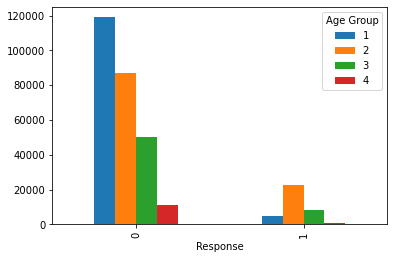

In [138]:
age_insurance.unstack(level=0).plot(kind='bar', subplots=False)

In [139]:
drlicence_insurance = train_data.groupby('Driving_License').Response.value_counts()
drlicence_insurance

Driving_License  Response
0                0              617
                 1               31
1                0           266965
                 1            37274
Name: Response, dtype: int64

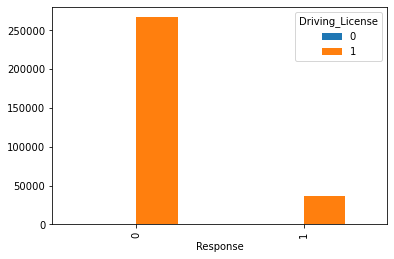

In [140]:
drlicence_insurance.unstack(level=0).plot(kind='bar', subplots=False)

In [141]:
policy_response = train_data.groupby('Policy_Sales_Channel').Response.value_counts()
policy_response

Policy_Sales_Channel  Response
1                     0             831
                      1              27
2                     0               2
                      1               1
3                     0             276
                                  ...  
159                   1               1
160                   0           17080
                      1             391
163                   0            1617
                      1             701
Name: Response, Length: 265, dtype: int64

In [142]:
premium_response = train_data.groupby('Annual_Premium_Group').Response.value_counts()
premium_response

Annual_Premium_Group  Response
1                     0            45057
                      1             6845
2                     0           221998
                      1            30364
3                     0              527
                      1               96
Name: Response, dtype: int64

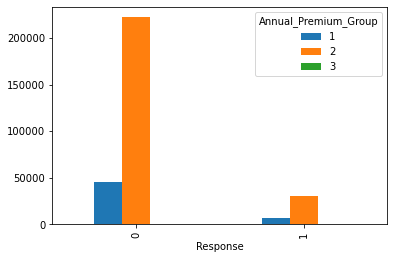

In [143]:
premium_response.unstack(level=0).plot(kind='bar', subplots=False)

### Drop the unwanted columns

In [144]:
train_data.head()

,id,Gender,Age,Premium_Group,Age Group,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Group
0,350957,1,50,Millions,2,1,41,0,1,1,35915,124,240,0,2
1,239788,2,48,Millions,2,1,28,0,1,1,26873,124,274,0,2
2,348272,2,34,Thousands,2,1,41,0,1,1,2630,156,138,1,1
3,73940,2,43,Millions,2,1,28,0,1,1,46877,124,223,0,2
4,292871,1,29,Millions,1,1,28,1,2,0,38009,152,106,0,2


In [145]:
test_data.head()

,id,Gender,Age,Premium_Group,Age Group,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Annual_Premium_Group
0,291378,1,31,Thousands,2,1,18,0,1,1,2630,156,152,1
1,154746,2,24,Millions,2,1,15,1,2,0,28105,152,267,2
2,218512,2,25,Millions,2,1,14,1,2,0,29302,152,139,2
3,173930,1,49,Millions,2,1,28,0,1,1,28357,26,12,2
4,241471,1,55,Millions,1,1,45,0,1,1,33288,26,44,2


In [146]:
dum_data = test_data.copy()
train_data.drop(['id', 'Age', 'Premium_Group', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
                axis=1, inplace=True)
train_data.head()

,Gender,Age Group,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Annual_Premium_Group
0,1,2,1,0,1,1,0,2
1,2,2,1,0,1,1,0,2
2,2,2,1,0,1,1,1,1
3,2,2,1,0,1,1,0,2
4,1,1,1,1,2,0,0,2


In [147]:
test_data.drop(['id', 'Age', 'Premium_Group', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
                axis=1, inplace=True)
test_data.head()

,Gender,Age Group,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium_Group
0,1,2,1,0,1,1,1
1,2,2,1,1,2,0,2
2,2,2,1,1,2,0,2
3,1,2,1,0,1,1,2
4,1,1,1,0,1,1,2


### Split Train and Test data

In [148]:
X = train_data.drop('Response', axis=1)
y = train_data['Response']

In [149]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [150]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [151]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 267582, 1: 37305})
Resample dataset shape Counter({0: 267582, 1: 267582})


In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2, random_state = 9)

In [153]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

In [154]:
### Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_train_acc = round(lr.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(lr_train_acc) + '%')

lr_test_acc = round(lr.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(lr_test_acc) + '%')

Train Accuracy: 38.14%
Test Accuracy: 38.19%


In [155]:
### Logistic Regression
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred_lr = logr.predict(X_test)
logr_train_acc = round(logr.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(logr_train_acc) + '%')

logr_test_acc = round(logr.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(logr_test_acc) + '%')

Train Accuracy: 78.44%
Test Accuracy: 78.53%


In [48]:
### Support Vector
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_svc) + '%')

acc_svc = round(clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_svc) + '%')

Train Accuracy: 87.69%
Test Accuracy: 87.97%


In [ ]:
# Linear SVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_linear_svc) + '%')

acc_linear_svc = round(clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_linear_svc) + '%')

In [ ]:
# KN Neighbors
kn_clf = KNeighborsClassifier(n_neighbors = 2)
kn_clf.fit(X_train, y_train)
y_pred_knn = kn_clf.predict(X_test)
acc_knn = round(kn_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_knn) + '%')

acc_knn = round(kn_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_knn) + '%')

In [156]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
acc_dt = round(dt_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_dt) + '%')

acc_dt = round(dt_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_dt) + '%')

Train Accuracy: 78.86%
Test Accuracy: 78.85%


In [157]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = round(rf_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_rf) + '%')

acc_rf = round(rf_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_rf) + '%')

Train Accuracy: 78.86%
Test Accuracy: 78.85%


In [158]:
# GaussionNB Classifier
gb_clf = GaussianNB()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
acc_gb = round(gb_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_gb) + '%')

acc_gb = round(rf_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_gb) + '%')

Train Accuracy: 78.44%
Test Accuracy: 78.85%


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# CatBoost Classification
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_pred_cb = cb_clf.predict(X_test)
acc_cb = round(cb_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_cb) + '%')

acc_cb = round(cb_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_cb) + '%')

In [102]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)
y_pred_mnb = mnb_clf.predict(X_test)
acc_mnb = round(mnb_clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_mnb) + '%')

acc_mnb = round(mnb_clf.score(X_test, y_test) * 100, 2)
print ("Test Accuracy: " + str(acc_mnb) + '%')

Train Accuracy: 77.2%
Test Accuracy: 77.22%


In [103]:
prediction = rf_clf.predict(X_test)
prediction

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [104]:
rf_clf_prediction = rf_clf.predict(test_data)
rf_clf_prediction

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [105]:
output_csv =pd.DataFrame()
output_csv["id"] = dum_data["id"]
output_csv["Response"] = pd.DataFrame(rf_clf_prediction)

In [106]:
output_csv["Response"].unique()
output_csv.to_csv("output.csv", index=False)

In [77]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [3, 6, 9, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 6, 9, 12, 15]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [3, 6, 9, 12], 'min_samples_leaf': [3, 6, 9, 12, 15], 'criterion': ['entropy', 'gini']}


In [78]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 66.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 125.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [3, 6, 9, 12, 15],
                                        'min_samples_split': [3, 6, 9, 12],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=100, verbose=2)

In [79]:
rf_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [80]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [3, 6, 9, 12, 15],
                                        'min_samples_split': [3, 6, 9, 12],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=100, verbose=2)

In [81]:
best_random_grid=rf_randomcv.best_estimator_

In [82]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       min_samples_leaf=6, min_samples_split=3)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[53650     2]
 [ 7322     4]]
Accuracy Score 0.8798911082685559
Classification report:               precision    recall  f1-score   support

           0       0.88      1.00      0.94     53652
           1       0.67      0.00      0.00      7326

    accuracy                           0.88     60978
   macro avg       0.77      0.50      0.47     60978
weighted avg       0.85      0.88      0.82     60978



In [86]:
best_random_grid.score(X_test, y_test)

0.8798911082685559

In [87]:
y_pred = best_random_grid.predict(test_data)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
output_csv =pd.DataFrame()
output_csv["id"] = test_data["id"]
output_csv["Response"] = pd.DataFrame(rfc_prediction)
output_csv["Response"].unique()
output_csv.to_csv("output.csv")

KeyError: 'id'